# 04_2.One Sample t-test(연습문제1)
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 세션 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
ost_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/04_3.calorie.csv', encoding="cp949")
ost_df.head()

,칼로리1,칼로리2,칼로리3
0,509,511,512
1,491,493,494
2,501,503,504
3,502,504,505
4,498,500,501


### 2.2 자료구조 살펴보기

In [4]:
ost_df.shape

(41, 3)

In [5]:
ost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   칼로리1    41 non-null     int64
 1   칼로리2    41 non-null     int64
 2   칼로리3    41 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [6]:
ost_df.columns

Index(['칼로리1', '칼로리2', '칼로리3'], dtype='object')

## 3.기술통계

In [47]:
# 수치형 변수
ost_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
칼로리1,40.0,499.15,4.09,490.0,497.0,499.5,502.0,509.0
칼로리2,40.0,501.15,4.09,492.0,499.0,501.5,504.0,511.0
칼로리3,40.0,502.15,4.09,493.0,500.0,502.5,505.0,512.0


In [8]:
ost_df.agg({"칼로리1": ["count", "mean", "std", "min", "max", "median", "skew", "kurtosis"]}).T \
    .round(2)

,count,mean,std,min,max,median,skew,kurtosis
칼로리1,41.0,501.61,16.26,490.0,600.0,500.0,5.79,35.74


## 4.t-test

### 4.1 차이가 있는 경우(two-sided)

In [36]:
# two-sided
pg.ttest(ost_df["칼로리1"], 500, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.316,39,two-sided,0.196,"[497.84, 500.46]",0.208,0.379,0.25


In [37]:
# two-sided
pg.ttest(ost_df["칼로리2"], 500, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.78,39,two-sided,0.083,"[499.84, 502.46]",0.281,0.718,0.412


In [38]:
# two-sided
pg.ttest(ost_df["칼로리3"], 500, alternative = "two-sided").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.328,39,two-sided,0.002,"[500.84, 503.46]",0.526,17.145,0.901


### 4.2 양측과 단측 검정 비교(greater)

In [39]:
# greater
pg.ttest(ost_df["칼로리2"], 500, alternative = "greater").round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.78,39,greater,0.041,"[500.06, inf]",0.281,1.436,0.542


In [40]:
# greater
pg.ttest(ost_df["칼로리3"], 500, alternative = "greater").round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.328,39,greater,0.001,"[501.06, inf]",0.5262,34.291,0.9479


## 5.가정검정

### 5.1 정규성 검정

In [41]:
pg.normality(ost_df["칼로리1"])

,W,pval,normal
칼로리1,0.98148,0.744205,True


In [42]:
pg.normality(ost_df).T.round(3)

,칼로리1,칼로리2,칼로리3
W,0.98148,0.98148,0.98148
pval,0.744205,0.744205,0.744205
normal,True,True,True


### 5.2 이상치제거

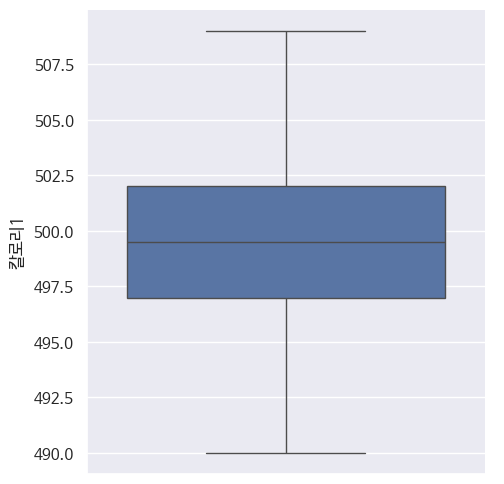

In [43]:
# 한글 폰트 인식
sns.catplot(data = ost_df,
            y = "칼로리1",
            kind = "box")
plt.show()

In [44]:
filter = (ost_df["칼로리1"] >= 600)
ost_df.loc[filter]

,칼로리1,칼로리2,칼로리3


In [45]:
ost_df.drop(ost_df[filter].index, inplace = True)

In [46]:
pg.normality(ost_df).T.round(3)

,칼로리1,칼로리2,칼로리3
W,0.98148,0.98148,0.98148
pval,0.744205,0.744205,0.744205
normal,True,True,True


## 6.비모수 통계

## 7.검증결과 그래프

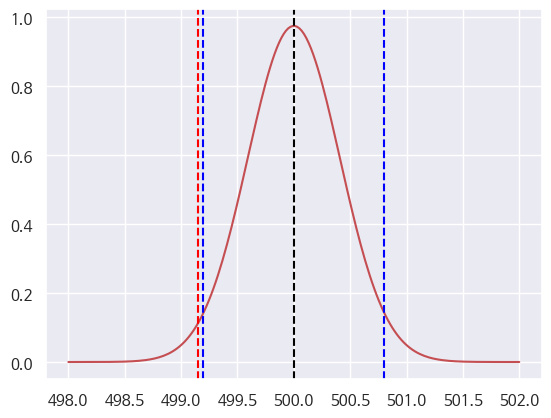

In [52]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(498, 502, 200)

mu = 500   # 모집단 평균
x = 499.15 # 표본평균
std = 4.09/np.sqrt(100) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = mu, scale = std), 'r-')
plt.axvline(x = mu, color='black', linestyle='--')
plt.axvline(x = mu - 1.96 * std, color='blue', linestyle='--')
plt.axvline(x = mu + 1.96 * std, color='blue', linestyle='--')
plt.axvline(x = 499.15, color='red', linestyle='--')
plt.show()